# EDA for Dubai historical weather data (2020-2025) 🇸🇦

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme(style="whitegrid")
%matplotlib inline

## Load and prepare the data

In [3]:
df = pd.read_csv("../data/raw/open-meteo-25.06N55.28E27m-Dubai.csv")
df['time'] = pd.to_datetime(df['time'])
df['month'] = df['time'].dt.month_name()

month_order = ['January', 'February', 'March', 'April', 'May', 'June','July','August','September', 'October', 'November', 'December']
df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)

df.head()

,time,weather_code (wmo code),temperature_2m_mean (°C),apparent_temperature_mean (°C),relative_humidity_2m_mean (%),wind_speed_10m_mean (km/h),city,month
0,2020-01-01,3,20.1,18.8,65,14.2,Dubai,January
1,2020-01-02,3,20.8,21.5,77,10.9,Dubai,January
2,2020-01-03,2,21.0,21.3,68,8.0,Dubai,January
3,2020-01-04,0,21.8,20.0,49,12.6,Dubai,January
4,2020-01-05,53,22.6,20.9,57,20.2,Dubai,January


## General dataset overview

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   time                            1994 non-null   datetime64[ns]
 1   weather_code (wmo code)         1994 non-null   int64         
 2   temperature_2m_mean (°C)        1994 non-null   float64       
 3   apparent_temperature_mean (°C)  1994 non-null   float64       
 4   relative_humidity_2m_mean (%)   1994 non-null   int64         
 5   wind_speed_10m_mean (km/h)      1994 non-null   float64       
 6   city                            1994 non-null   object        
 7   month                           1994 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 111.5+ KB


In [5]:
df.describe()

,time,weather_code (wmo code),temperature_2m_mean (°C),apparent_temperature_mean (°C),relative_humidity_2m_mean (%),wind_speed_10m_mean (km/h)
count,1994,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,2022-09-23 12:00:00,4.994985,27.905015,29.141274,56.746239,13.003711
min,2020-01-01 00:00:00,0.000000,14.800000,11.700000,10.000000,6.500000
25%,2021-05-13 06:00:00,0.000000,22.300000,22.100000,48.000000,10.400000
50%,2022-09-23 12:00:00,2.000000,28.100000,29.000000,58.000000,12.300000
75%,2024-02-03 18:00:00,3.000000,33.500000,36.400000,66.000000,14.800000
max,2025-06-16 00:00:00,65.000000,39.500000,44.000000,88.000000,38.300000
std,NaN,13.249089,6.114176,7.955827,12.867958,3.630004


In [6]:
df.dtypes

time                              datetime64[ns]
weather_code (wmo code)                    int64
temperature_2m_mean (°C)                 float64
apparent_temperature_mean (°C)           float64
relative_humidity_2m_mean (%)              int64
wind_speed_10m_mean (km/h)               float64
city                                      object
month                                   category
dtype: object

In [7]:
df.isnull().sum()

time                              0
weather_code (wmo code)           0
temperature_2m_mean (°C)          0
apparent_temperature_mean (°C)    0
relative_humidity_2m_mean (%)     0
wind_speed_10m_mean (km/h)        0
city                              0
month                             0
dtype: int64

In [8]:
df.duplicated(['city', 'time']).sum()

np.int64(0)

> No null values nor duplicates found

## Univariate analysis

## Daily temperature distribution
> The number of days when the mean temperature fell within a certain range

Text(0.5, 0, 'Temperature (°C)')

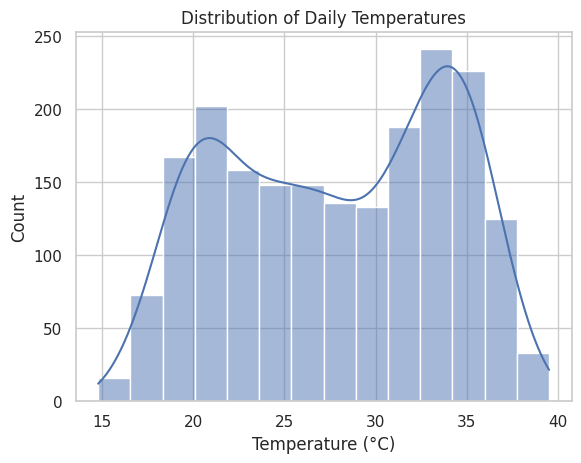

In [9]:
sns.histplot(df['temperature_2m_mean (°C)'], kde=True)
plt.title("Distribution of Daily Temperatures")
plt.xlabel("Temperature (°C)")

- Most temperatures fall between **32.5°C and 36°C** and sometimes around 22°C
- Most common average daily temperature: **33°C**
- Temperatures tends to be very high

## Daily humidity distribution

Text(0.5, 1.0, 'Humidity Level Distribution')

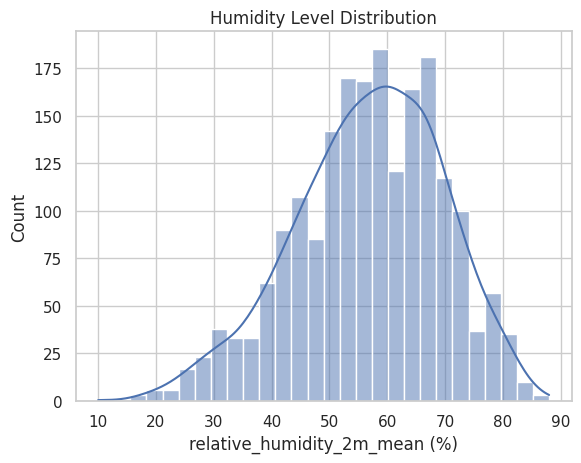

In [10]:
sns.histplot(df['relative_humidity_2m_mean (%)'], kde=True)
plt.title("Humidity Level Distribution")

- Most days average or lower humidity percentage **(<70%)**

## Daily apparent temperature distribution

Text(0.5, 1.0, 'Apparent Temperature Distribution')

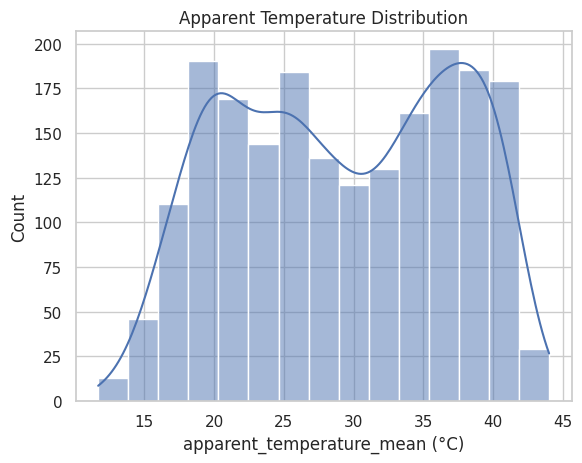

In [11]:
sns.histplot(df['apparent_temperature_mean (°C)'], kde=True)
plt.title("Apparent Temperature Distribution")

- Dubai has a **very warm perceived climate** year-round
- There are quite a high number of days where temperature feels like 19°C or 25°C

## In-depth analysis

### Actual vs Apparent Temperature

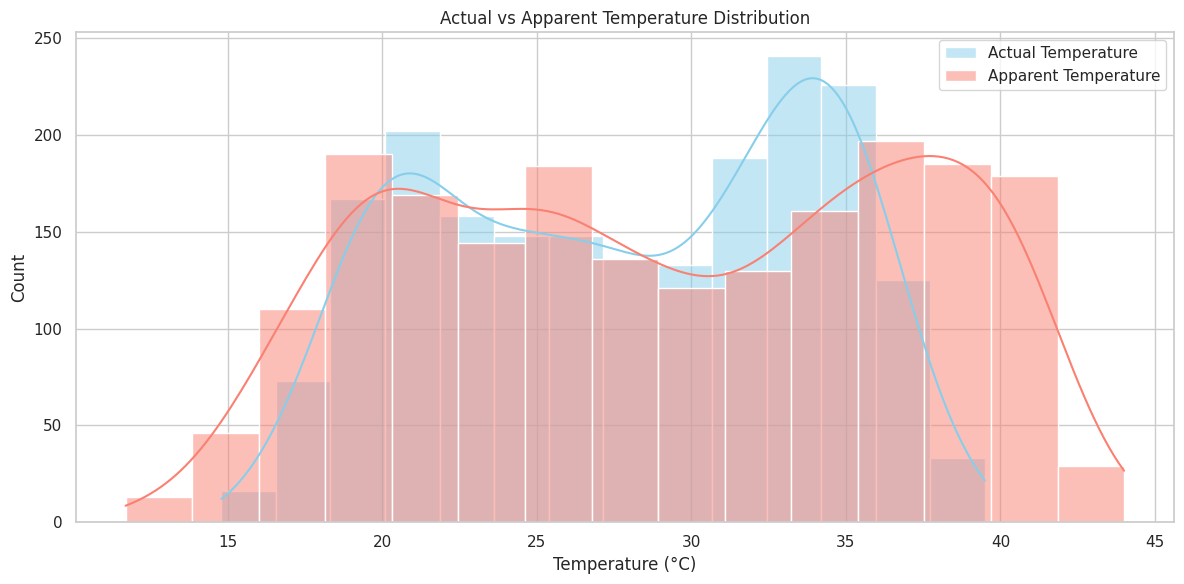

In [12]:
plt.figure(figsize=(12, 6))

sns.histplot(df['temperature_2m_mean (°C)'], kde=True, color='skyblue', label='Actual Temperature', stat="count")

sns.histplot(df['apparent_temperature_mean (°C)'], kde=True, color='salmon', label='Apparent Temperature', stat="count")

plt.title("Actual vs Apparent Temperature Distribution")
plt.xlabel("Temperature (°C)")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

- Humidity makes actual temperature feels higher than actual temperature
- The city tends to feel sightly hotter than it is

In [13]:
# Compute monthly averages
monthly_avg = df.groupby('month', as_index=False, observed=True).agg({
    'temperature_2m_mean (°C)': 'mean',
    'relative_humidity_2m_mean (%)': 'mean'
})
# Ensure the month order is preserved after grouping
monthly_avg['month'] = pd.Categorical(
    monthly_avg['month'],
    categories=month_order,
    ordered=True
)

# Then sort by month
monthly_avg = monthly_avg.sort_values('month')


print(monthly_avg)

        month  temperature_2m_mean (°C)  relative_humidity_2m_mean (%)
0     January                 18.960753                      65.075269
1    February                 20.488824                      65.505882
2       March                 23.545699                      58.080645
3       April                 27.298333                      50.444444
4         May                 31.155376                      49.193548
5        June                 34.071084                      51.331325
6        July                 35.929032                      50.890323
7      August                 35.679355                      51.206452
8   September                 33.142667                      56.473333
9     October                 29.678710                      58.606452
10   November                 25.860000                      61.553333
11   December                 21.541935                      62.870968


### Monthly average temperature and humidity

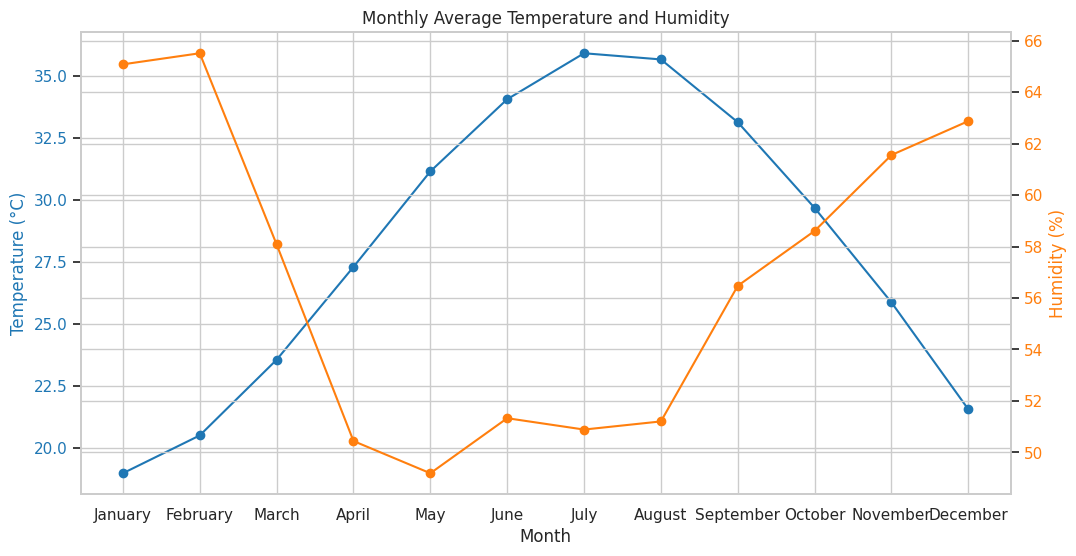

In [14]:
# Average monthly temperature and humidity plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot temperature on left axis
ax1.set_xlabel('Month')
ax1.set_ylabel('Temperature (°C)', color='tab:blue')
ax1.plot(monthly_avg['month'], monthly_avg['temperature_2m_mean (°C)'],
         marker='o', color='tab:blue', label='Temperature')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for humidity
ax2 = ax1.twinx()
ax2.set_ylabel('Humidity (%)', color='tab:orange')
ax2.plot(monthly_avg['month'], monthly_avg['relative_humidity_2m_mean (%)'],
         marker='o', color='tab:orange', label='Humidity')
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.title("Monthly Average Temperature and Humidity")
plt.xticks(rotation=45)
plt.show()

## Correlations of each numerical value

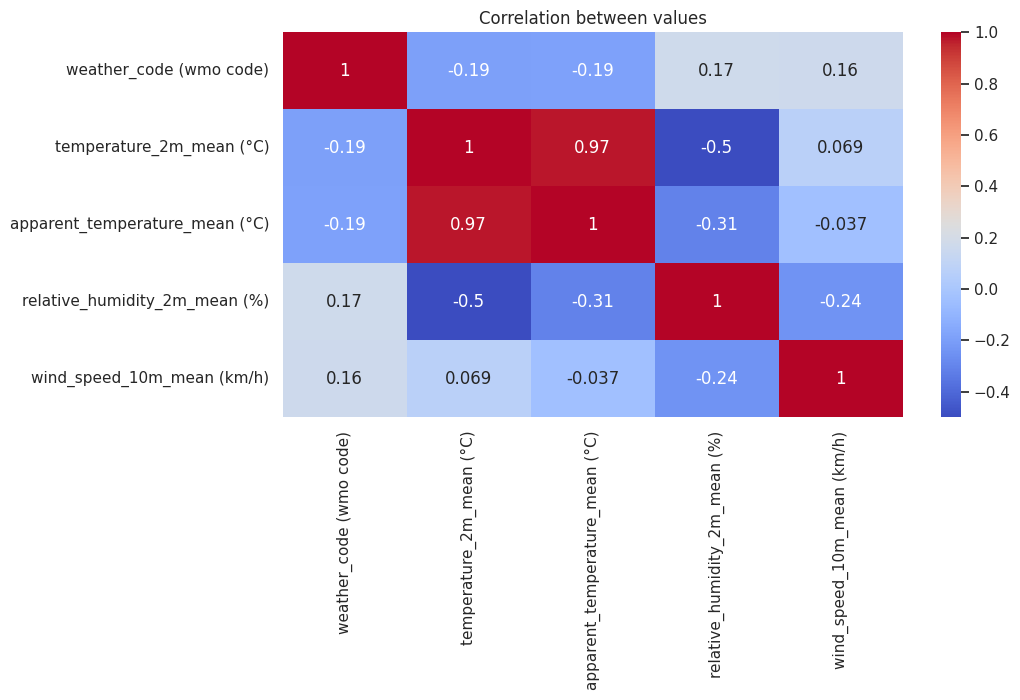

In [15]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation between values")
plt.show()

- The apparent temperature rises with the actual temperature.
- As temperature increases, relative humidity tends to decrease.
- Wind speed doesn’t seem to significantly co-vary with other factors.